analyze the original IGUB dataset

-difference in difficulty in different questions?

-relationship between uncertainty/performance and learning choice?

In [1]:
import platform
platform.python_version()

'3.6.6'

In [2]:
import pandas as pd
#import matplotlib as plt
#plt=__import__("matplotlib.pyplot")
import matplotlib.pyplot as plt

import numpy as np
import scipy
import scipy.stats as stats
import random
mydata = pd.read_csv("IGUB_long_data.csv")
sdata = pd.read_csv('IGUB_short_data.csv')
sdata=sdata.assign(psy_T=(sdata['testing choice']=='tummy'))

#exclude all 0 or all 1 biased
#sdata = sdata[sdata.Total != 0]
#sdata = sdata[sdata.Total != 11]
#sdata = sdata.loc[0:42,]
sdata.shape
#mydata.shape
#sdata.psycho=sdata.Charlie+sdata.Aiden+sdata.August+sdata.Ari+sdata.Blake

(68, 26)

analyze short version, difference between explanation and prediction conditions

Based on Wellman etc., explanation comes before prediction? (here explanation also involves additional data, so maybe not fair comparison)


In [3]:
#sdata['psycho'].hist(by=sdata['condition2'])
#pd.crosstab(sdata.psycho,sdata.condition2)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a25d0c748>,
      dtype=object)

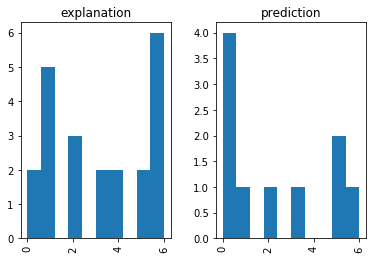

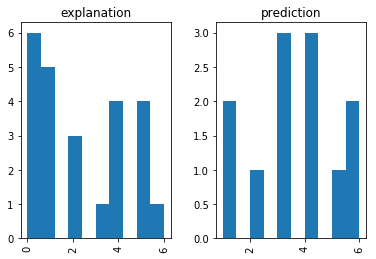

In [4]:
sdata[sdata.psy_T==1].psycho.hist(by=sdata['condition2'])
sdata[sdata.psy_T==0].psycho.hist(by=sdata['condition2'])

In [5]:
psy_ep=pd.DataFrame(pd.crosstab(sdata[sdata.psy_T==1].psycho,sdata[sdata.psy_T==1].condition2))
psy_ep=psy_ep.assign(uc=[0,0,1,1,1,2,2])
psy_all=pd.DataFrame(pd.crosstab(sdata.psycho,sdata.condition2))
psy_all=psy_all.assign(uc=[0,0,1,1,1,2,2])

psy_ep1=psy_ep.groupby('uc').agg('sum')/psy_all.groupby('uc').agg('sum')
psy_all

condition2,explanation,prediction,uc
psycho,,,
0,8,4,0
1,10,3,0
2,6,2,1
3,3,4,1
4,6,3,1
5,6,3,2
6,7,3,2


In [6]:
import gmpy2 as gp

#Chance of getting 0, 1, 2, 3, 4, 5, 6 correct: 
print(gp.comb(6,6)*pow(0.5,6))
print(gp.comb(6,5)*pow(0.5,6))
print(gp.comb(6,4)*pow(0.5,6))
print(gp.comb(6,3)*pow(0.5,6))
print(gp.comb(6,2)*pow(0.5,6))
print(gp.comb(6,1)*pow(0.5,6))
print(gp.comb(6,0)*pow(0.5,6))

0.015625
0.09375
0.234375
0.3125
0.234375
0.09375
0.015625


uc
0    0.388889
1    0.466667
2    0.615385
Name: explanation, dtype: float64


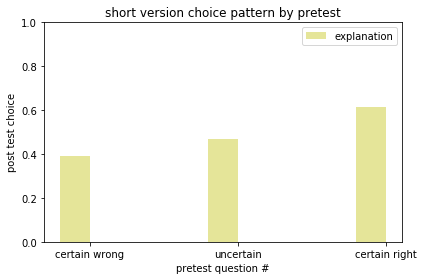

In [7]:
n_groups = 3

means_e = psy_ep1['explanation']
means_p = psy_ep1['prediction']
print(means_e)
fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.2

opacity = 0.4
error_config = {'ecolor': '0.3'}


rects1 = ax.bar(index, means_e, bar_width,
                alpha=opacity, color='y',
                label='explanation')
#rects2 = ax.bar(index + bar_width, means_p, bar_width,
                #alpha=opacity, color='c',
                #label='prediction')

ax.set_xlabel('pretest question #')
ax.set_ylabel('post test choice')
ax.set_title('short version choice pattern by pretest')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('certain wrong','uncertain','certain right'))
ax.set_ylim([0, 1])
ax.legend()

fig.tight_layout()
plt.show()

Pre-transition: know for sure how bunny got tummy ache, so should choose foot overwhelmingly
Post-transition: equally unsure about how bunny got tummy ache or sore foot, so should be 50%
At transition state, should be approaching 50%

especially that people might just respond based on preference for foot/tummy; should ask about two people having tummy ache, one ate cheese and XXX; one ate cheese and felt worried

question may show inversed U shape: Bunny sometimes eats cheese, Bunny sometimes feels worried, Bunny sometimes runs on hard rocks. Bunny has a tummy ache today. Oh no! How come Bunny has a tummy ache? We need to find out! What shall we ask Bunny? Shall we ask Bunny what she ate today, or shall we ask Bunny how she feels today, or shall we ask Bunny what she did today?

dummy check question:
1) ask directly about children's preference
2) pose dummy alternatives. e.g., Monkey eats banana, Monkey watches some TV, Monkey has a tummy ache; Monkey bumps head, Monkey eats ice cream really really fast, Monkey has headache.  

In [8]:
sdata.groupby('condition2').describe()['psycho']

,count,mean,std,min,25%,50%,75%,max
condition2,,,,,,,,
explanation,46.0,2.760870,2.151845,0.0,1.0,2.0,5.00,6.0
prediction,22.0,2.909091,2.091003,0.0,1.0,3.0,4.75,6.0


In [9]:
#no difference between explanation and prediction
stats.chi2_contingency(pd.crosstab(sdata.psycho,sdata.condition2))

(2.7127539127539126, 0.8439385506383892, 6, array([[8.11764706, 3.88235294],
        [8.79411765, 4.20588235],
        [5.41176471, 2.58823529],
        [4.73529412, 2.26470588],
        [6.08823529, 2.91176471],
        [6.08823529, 2.91176471],
        [6.76470588, 3.23529412]]))

below is long version analysis

In [10]:
mydata.columns = mydata.columns.str.replace("-","_")
#mydata=mydata.loc[0:58,:] 
#mydata.shape
mydata.ToM = (mydata.ToM=='table')
mydata.Germ=(mydata.Germ=='temp')
mydata.Psycho=(mydata.Psycho=='phone(tummy)')

mydata = mydata[mydata.yesbias == 0]


In [18]:
mydata.shape

In [60]:
# ToM0=pd.DataFrame(pd.crosstab(mydata.ToM_ass_T,mydata.ToM))
# ToM0=ToM0.assign(uc=[0,0,1,1,1,2,2])
# mean_ToM0=ToM0.groupby('uc').agg('sum')[1]/(ToM0.groupby('uc').agg('sum')[1]+ToM0.groupby('uc').agg('sum')[0])

# germ0=pd.DataFrame(pd.crosstab(mydata.Germ_ass_T,mydata.Germ))
# germ0=germ0.assign(uc=[0,0,1,1,1,2,2])
# mean_germ0=germ0.groupby('uc').agg('sum')[1]/(germ0.groupby('uc').agg('sum')[1]+germ0.groupby('uc').agg('sum')[0])

# psy0=pd.DataFrame(pd.crosstab(mydata.Psych_ass_T,mydata.Psycho))
# psy0=psy0.assign(uc=[0,0,1,1,1,2,2])
# mean_psy0=psy0.groupby('uc').agg('sum')[1]/(psy0.groupby('uc').agg('sum')[1]+psy0.groupby('uc').agg('sum')[0])
mydata['count']=[1]*mydata.shape[0]

mydata['ToMf'] = (mydata.ToM_ass_T >=mydata.ToM_ass_T.quantile(q=0.5))
mydata['Germf']=(mydata.Germ_ass_T >= mydata.Germ_ass_T.quantile(q=0.5))
mydata['Psychf'] = (mydata.Psych_ass_T >= mydata.Psych_ass_T.quantile(q=0.5))

mean_ToM0=mydata.groupby('ToMf').agg('sum')['ToM']/mydata.groupby('ToMf').agg('sum')['count']
mean_germ0=mydata.groupby('Germf').agg('sum')['Germ']/mydata.groupby('Germf').agg('sum')['count']
mean_psy0=mydata.groupby('Psychf').agg('sum')['Psycho']/mydata.groupby('Psychf').agg('sum')['count']

mean_ToM0

ToMf
False    0.538462
True     0.400000
dtype: float64

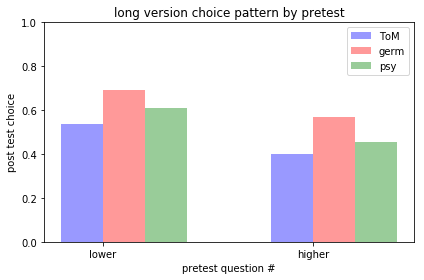

In [62]:
n_groups = 2

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.2

opacity = 0.4
error_config = {'ecolor': '0.3'}


rects1 = ax.bar(index, mean_ToM0, bar_width,
                alpha=opacity, color='b',
                label='ToM')
rects2 = ax.bar(index + bar_width, mean_germ0, bar_width,
                alpha=opacity, color='r',
                label='germ')
rects3 = ax.bar(index + bar_width*2, mean_psy0, bar_width,
                alpha=opacity, color='g',
                label='psy')

ax.set_xlabel('pretest question #')
ax.set_ylabel('post test choice')
ax.set_title('long version choice pattern by pretest')
ax.set_xticks(index + bar_width / 2)
# ax.set_xticklabels(('certain wrong','uncertain','certain right'))
ax.set_xticklabels(('lower','higher'))
ax.set_ylim([0, 1])
ax.legend()

fig.tight_layout()
plt.show()

checking if there are significant difference between items in pretest

In [14]:
stats.chi2_contingency(pd.crosstab(mydata.ToM_ass4, mydata.ToM_ass5))
stats.chi2_contingency(pd.crosstab(mydata.germ_Dana, mydata.germ_Riley))

(16.790017825311942, 4.17523591801301e-05, 1, array([[ 8.25, 12.75],
        [13.75, 21.25]]))

In [15]:
mydata.loc[:,'germ_Chris':'psy_Blake']=1*(mydata.loc[:,'germ_Chris':'psy_Blake']=='y')

In [16]:
cordata=mydata.loc[:, 'ToM_ass1':'ToM_ass6']
cordata.corr()

,ToM_ass1,ToM_ass2,ToM_ass3,ToM_ass4,ToM_ass5,ToM_ass6
ToM_ass1,1.000000,0.591236,0.709812,0.508772,0.204966,0.205196
ToM_ass2,0.591236,1.000000,0.475064,0.746678,0.297053,0.211027
ToM_ass3,0.709812,0.475064,1.000000,0.460338,0.326160,0.075263
ToM_ass4,0.508772,0.746678,0.460338,1.000000,0.511049,0.045599
ToM_ass5,0.204966,0.297053,0.326160,0.511049,1.000000,0.047946
ToM_ass6,0.205196,0.211027,0.075263,0.045599,0.047946,1.000000


In [17]:
cordata=mydata.loc[:, 'germ_Chris':'germ_Andy']
cordata.corr()
from scipy.stats import pearsonr
pearsonr(mydata.loc[:, 'ToM_ass3'],mydata.loc[:, 'ToM_ass5'])

(0.3261596384606354, 0.014159160939622816)

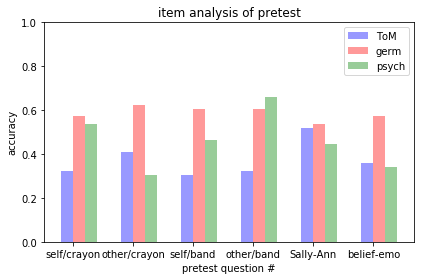

In [18]:
n_groups = 6

means_ToM = mydata.loc[:,'ToM_ass1':'ToM_ass6'].mean(0)
    #se_ToM = mydata.loc[:,'ToM_ass1':'ToM_ass6'].std(0)/np.sqrt(59)
means_germ = mydata.loc[:,'germ_Chris':'germ_Andy'].mean(0)
means_psy = mydata.loc[:,'psy_Charlie':'psy_Blake'].mean(0)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.2

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_ToM, bar_width,
                alpha=opacity, color='b',
                #yerr=se_ToM, error_kw=error_config,
                label='ToM')
rects2 = ax.bar(index + bar_width, means_germ, bar_width,
                alpha=opacity, color='r',
                label='germ')
rects2 = ax.bar(index + bar_width*2, means_psy, bar_width,
                alpha=opacity, color='g',
                label='psych')

ax.set_xlabel('pretest question #')
ax.set_ylabel('accuracy')
ax.set_title('item analysis of pretest')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('self/crayon', 'other/crayon', 'self/band', 'other/band', 'Sally-Ann','belief-emo'))
ax.set_ylim([0, 1])
ax.legend()

fig.tight_layout()
plt.show()

In [19]:
dataframe=mydata.loc[:,('Germ_ass_T','Psych_ass_T','ToM_ass_T')]
dataframe.corr()

,Germ_ass_T,Psych_ass_T,ToM_ass_T
Germ_ass_T,1.000000,0.432306,0.502709
Psych_ass_T,0.432306,1.000000,0.095546
ToM_ass_T,0.502709,0.095546,1.000000


In [20]:
x=mydata.loc[:,'ToM_ass1':'ToM_ass6'].mean(1)
y=mydata.loc[:,'germ_Chris':'germ_Andy'].mean(1)
pearsonr(x,y)

(0.5027087088209776, 7.86987046931583e-05)

In [21]:
x=mydata.loc[:,'ToM_ass1':'ToM_ass6'].mean(1)
y=mydata.loc[:,'psy_Charlie':'psy_Blake'].mean(1)
pearsonr(x,y)

(0.09554586817185114, 0.4836285427499958)

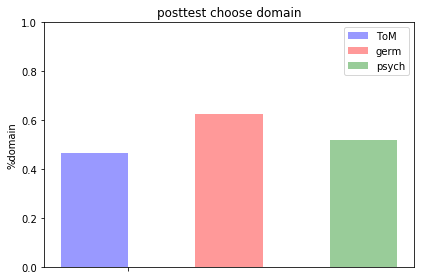

In [22]:
n_groups = 1

means_ToM1 = mydata.ToM.mean(0)
means_germ1 = mydata.Germ.mean(0)
means_psy1 = mydata.Psycho.mean(0)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.2

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_ToM1, bar_width,
                alpha=opacity, color='b',
                #yerr=se_ToM, error_kw=error_config,
                label='ToM')
rects2 = ax.bar(index + bar_width*2, means_germ1, bar_width,
                alpha=opacity, color='r',
                label='germ')
rects2 = ax.bar(index + bar_width*4, means_psy1, bar_width,
                alpha=opacity, color='g',
                label='psych')

ax.set_xlabel('')
ax.set_ylabel('%domain')
ax.set_title('posttest choose domain')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels('')
ax.set_ylim([0, 1])
ax.legend()

fig.tight_layout()
plt.show()

The above two graphs showed that:
1)children find the pre-test germ questions easier than psy, both easier than ToM
2)children were more likely to choose in-domain follow-up in germ compared to the rest

Does this mean better performance lead to more information seeking??? (skip below to see additional analysis)

Checking distribution of answers based on all pre-test items.
It appears that the distribution is super un-even across different domains.

In [23]:
means_ToM2 = mydata.loc[:,'ToM_ass1':'ToM_ass6'].mean(1)
means_germ2 = mydata.loc[:,'germ_Chris':'germ_Andy'].mean(1)
means_psy2 = mydata.loc[:,'psy_Charlie':'psy_Blake'].mean(1)
#pd.crosstab(means_ToM2,means_germ2)

(array([23., 25.,  8.]),
 array([0.  , 0.34, 0.83, 1.  ]),
 <a list of 3 Patch objects>)

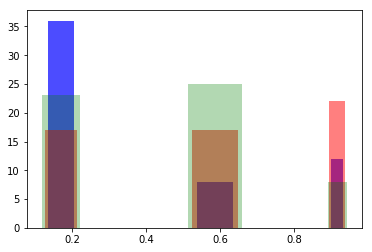

In [24]:
plt.hist(means_ToM2, bins=[0,0.34,0.83,1],color='b',alpha=0.7, rwidth = 0.2)
plt.hist(means_germ2, bins=[0,0.34,0.83,1],color='r',alpha=0.5, rwidth = 0.25)
plt.hist(means_psy2, bins=[0,0.34,0.83,1],color='g',alpha=0.3, rwidth = 0.3)

What about only analyzing the highest performing questions? Maybe there's something weird going on with the ToM questions...?
Distribution slightly more even?

In [25]:
means_ToM3 = mydata.loc[:,'ToM_ass5':'ToM_ass6'].mean(1)
means_germ3 = mydata.loc[:,'germ_Jordan':'germ_Andy'].mean(1)
means_psy3 = mydata.loc[:,'psy_Ari':'psy_Blake'].mean(1)

(array([24., 20., 12.]),
 array([0.  , 0.25, 0.8 , 1.  ]),
 <a list of 3 Patch objects>)

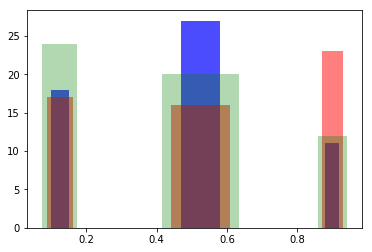

In [26]:
plt.hist(means_ToM3, bins=[0,0.25,0.8,1],color='b',alpha=0.7, rwidth = 0.2)
plt.hist(means_germ3, bins=[0,0.25,0.8,1],color='r',alpha=0.5, rwidth = 0.3)
plt.hist(means_psy3, bins=[0,0.25,0.8,1],color='g',alpha=0.3, rwidth = 0.4)

Based on only the higher-performing ToM items and corresponding germ and psy items, re-analyzed performance pattern for post-test

plotting "what percentage of kids in each performance group in each domain selected the domain-relevant option"

In [27]:
mydata=mydata.assign(ToM3=means_ToM3,germ3=means_germ3,psy3=means_psy3)
df = mydata.loc[:,('ToM','ToM3','Germ','germ3','Psycho','psy3')]
means_ToM4=pd.DataFrame(pd.crosstab(mydata.ToM,mydata.ToM3)/mydata.groupby('ToM3').size()).iloc[1]
means_germ4=pd.DataFrame(pd.crosstab(mydata.Germ,mydata.germ3)/mydata.groupby('germ3').size()).iloc[1]
means_psy4=pd.DataFrame(pd.crosstab(mydata.Psycho,mydata.psy3)/mydata.groupby('psy3').size()).iloc[1]

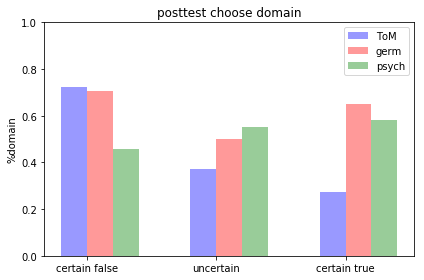

In [28]:
n_groups = 3

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.2

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_ToM4, bar_width,
                alpha=opacity, color='b',
                label='ToM')
rects2 = ax.bar(index + bar_width, means_germ4, bar_width,
                alpha=opacity, color='r',
                label='germ')
rects2 = ax.bar(index + bar_width*2, means_psy4, bar_width,
                alpha=opacity, color='g',
                label='psych')

ax.set_xlabel('')
ax.set_ylabel('%domain')
ax.set_title('posttest choose domain')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('certain false','uncertain','certain true'))
ax.set_ylim([0, 1])
ax.legend()

fig.tight_layout()
plt.show()

plotting "what percentage of kids choosing the domain-relevant option came from each pre-test group, for each domain"

mydata=mydata.assign(ToM3=means_ToM3,germ3=means_germ3,psy3=means_psy3)
df = mydata.loc[:,('ToM','ToM3','Germ','germ3','Psycho','psy3')]
means_ToM5=pd.DataFrame(pd.crosstab(mydata.ToM,mydata.ToM3).T/mydata.groupby('ToM').size())[1]
means_germ5=pd.DataFrame(pd.crosstab(mydata.Germ,mydata.germ3).T/mydata.groupby('Germ').size())[1]
means_psy5=pd.DataFrame(pd.crosstab(mydata.Psycho,mydata.psy3).T/mydata.groupby('Psycho').size())[1]
mydata.groupby('ToM').size()

n_groups = 3

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.2

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_ToM5, bar_width,
                alpha=opacity, color='b',
                label='ToM')
rects2 = ax.bar(index + bar_width, means_germ5, bar_width,
                alpha=opacity, color='r',
                label='germ')
rects2 = ax.bar(index + bar_width*2, means_psy5, bar_width,
                alpha=opacity, color='g',
                label='psych')

ax.set_xlabel('')
ax.set_ylabel('%domain')
ax.set_title('posttest choose domain')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('certain false','uncertain','certain true'))
ax.set_ylim([0, 1])
ax.legend()

fig.tight_layout()
plt.show()